In [3]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest

In [4]:


file_path = r"C:\Users\shubh\OneDrive\Desktop\FLIGHT-PRICE-PREDICTOR\Data\train.csv"

train = pd.read_csv(file_path)
train

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Indigo,2019-06-27,Chennai,Kolkata,13:15:00,15:35:00,140,0.0,No Info,3597
1,Jet Airways,2019-05-24,Kolkata,Banglore,20:25:00,23:35:00,1630,1.0,No Info,14151
2,Indigo,2019-05-27,Banglore,Delhi,10:10:00,13:00:00,170,0.0,No Info,3943
3,Jet Airways,2019-06-27,Delhi,Cochin,05:30:00,19:00:00,810,2.0,No Info,13014
4,Spicejet,2019-05-03,Kolkata,Banglore,06:55:00,09:30:00,155,0.0,No Info,3873
...,...,...,...,...,...,...,...,...,...,...
5879,Air India,2019-05-18,Kolkata,Banglore,05:50:00,20:25:00,875,2.0,No Info,12093
5880,Jet Airways,2019-05-24,Kolkata,Banglore,20:25:00,21:05:00,1480,1.0,No Info,14151
5881,Indigo,2019-05-18,Delhi,Cochin,17:10:00,01:30:00,500,1.0,No Info,7081
5882,Multiple Carriers,2019-06-06,Delhi,Cochin,13:00:00,21:00:00,480,1.0,No Info,13587


In [5]:

train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [6]:
#converting the relevant columns from object to datetime

train = train.assign(**{
	col: pd.to_datetime(train.loc[:, col], dayfirst=True, format="mixed")
	for col in ["date_of_journey", "dep_time", "arrival_time"]
})

train.dtypes


airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5884 entries, 0 to 5883
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          5884 non-null   object        
 1   date_of_journey  5884 non-null   datetime64[ns]
 2   source           5884 non-null   object        
 3   destination      5884 non-null   object        
 4   dep_time         5884 non-null   datetime64[ns]
 5   arrival_time     5884 non-null   datetime64[ns]
 6   duration         5884 non-null   int64         
 7   total_stops      5884 non-null   float64       
 8   additional_info  5884 non-null   object        
 9   price            5884 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 459.8+ KB


In [8]:
#Clearly no null values

train.describe(include="number")


,duration,total_stops,price
count,5884.000000,5884.000000,5884.000000
mean,631.098742,0.805404,9072.108430
std,501.627594,0.660972,4605.707123
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5276.750000
50%,505.000000,1.000000,8301.000000
75%,910.000000,1.000000,12373.000000
max,2565.000000,3.000000,62427.000000


In [9]:
(
    train.describe(include="O")
)

,airline,source,destination,additional_info
count,5884,5884,5884,5884
unique,9,5,6,7
top,Jet Airways,Delhi,Cochin,No Info
freq,2066,2450,2450,4617


In [11]:
train.additional_info.unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', 'Change airports',
       '1 Long layover', 'Business class', '2 Long layover'], dtype=object)

In [12]:
def missing_info(data):
  na_cols = [col for col in data.columns if data[col].isna().any()]
  na_counts = [data[col].isna().sum() for col in na_cols]
  na_pct = [(data[col].isna().mean() * 100) for col in na_cols]

  return (
      pd
      .DataFrame(data={
          "variable": na_cols,
          "count": na_counts,
          "percentage": na_pct
      })
      .sort_values(by="count", ascending=False)
      .set_index("variable")
  )

In [13]:
missing_info(train)
#no missing values

,count,percentage
variable,,


### High-level analysis of Outliers

In [14]:
forest = IsolationForest(n_estimators=10, random_state=42)

In [15]:

(
	train
	.assign(outlier=forest.fit_predict(
		train
		.drop(columns="price")
		.select_dtypes(include="number")
	))
	.query("outlier == -1")
	# .duration
	# .describe()
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Indigo,2019-06-27,Chennai,Kolkata,2024-09-26 13:15:00,2024-09-26 15:35:00,140,0.0,No Info,3597,-1
1,Jet Airways,2019-05-24,Kolkata,Banglore,2024-09-26 20:25:00,2024-09-26 23:35:00,1630,1.0,No Info,14151,-1
3,Jet Airways,2019-06-27,Delhi,Cochin,2024-09-26 05:30:00,2024-09-26 19:00:00,810,2.0,No Info,13014,-1
8,Indigo,2019-06-27,Mumbai,Hyderabad,2024-09-26 06:25:00,2024-09-26 07:55:00,90,0.0,No Info,4049,-1
11,Air India,2019-05-18,Kolkata,Banglore,2024-09-26 09:50:00,2024-09-26 23:15:00,805,2.0,No Info,15957,-1
...,...,...,...,...,...,...,...,...,...,...,...
5873,Indigo,2019-05-15,Mumbai,Hyderabad,2024-09-26 16:55:00,2024-09-26 18:25:00,90,0.0,No Info,3175,-1
5875,Air India,2019-06-03,Delhi,Cochin,2024-09-26 12:20:00,2024-09-26 19:15:00,1855,2.0,No Info,12488,-1
5879,Air India,2019-05-18,Kolkata,Banglore,2024-09-26 05:50:00,2024-09-26 20:25:00,875,2.0,No Info,12093,-1
5880,Jet Airways,2019-05-24,Kolkata,Banglore,2024-09-26 20:25:00,2024-09-26 21:05:00,1480,1.0,No Info,14151,-1


### Pair plots

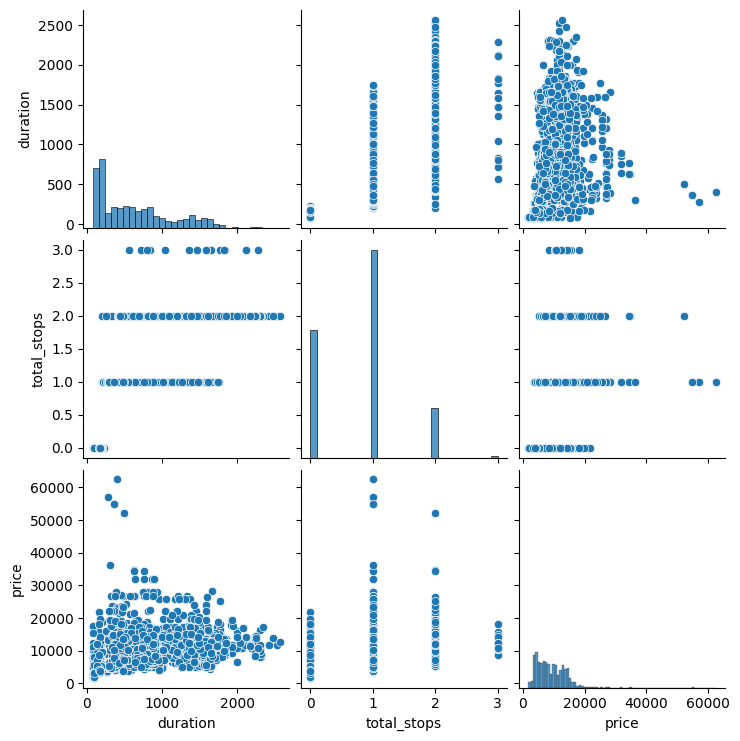

In [20]:
sns.pairplot(train.select_dtypes(include='number'))

### Heatmap

<Axes: >

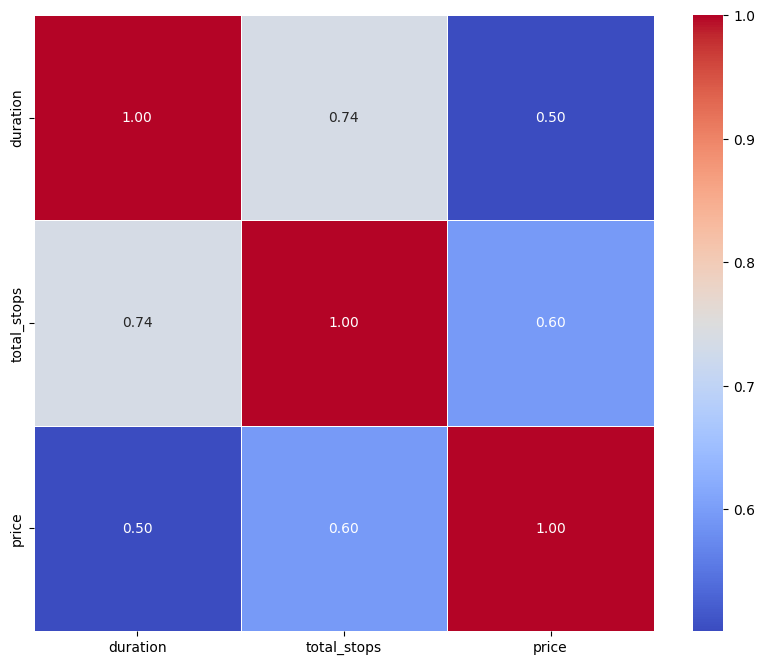

In [21]:
corr_matrix = train.select_dtypes(include='number').corr()


plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

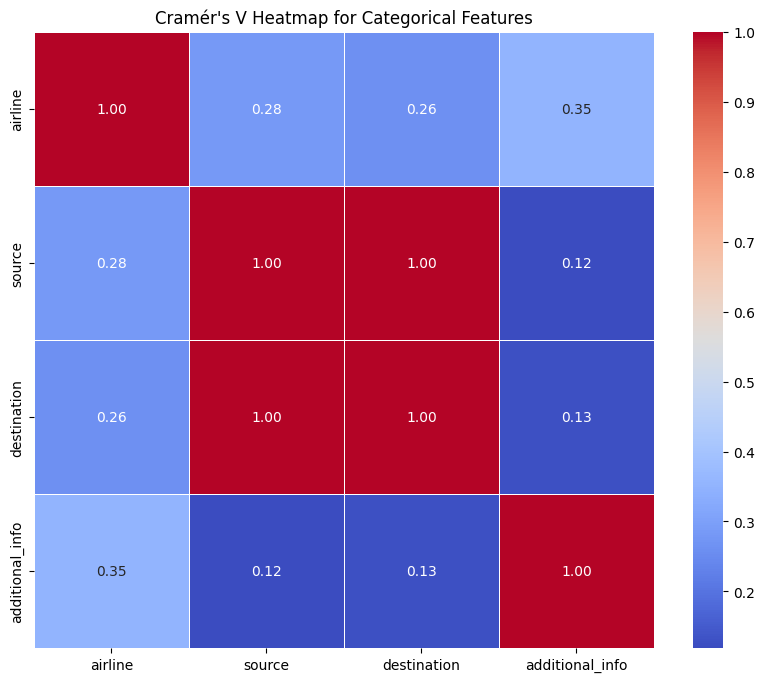

In [23]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))


categorical_features = train.select_dtypes(include=['object'])

cols = categorical_features.columns
n = len(cols)
cramers_v_matrix = pd.DataFrame(np.zeros((n, n)), index=cols, columns=cols)


for col1 in cols:
    for col2 in cols:
        cramers_v_matrix.loc[col1, col2] = cramers_v(categorical_features[col1], categorical_features[col2])


plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Cramér's V Heatmap for Categorical Features")
plt.show()

In [25]:
# Function to give detailed summary of categorical features, including categories distribution
def cat_summary(data, var):
   
    col = data.loc[:, var].copy()

    print(f"\nQuick Glance of {var}:")
    display(col)
    print("\nMeta-data:")
    print(f"{'Data Type':15}: {col.dtype}")
    print(f"{'Cardinality':15}: {col.nunique(dropna=True)} categories")
    print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
    print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

    # Summary
    print("\nSummary:")
    display(
        col
        .describe()
        .rename("")
        .to_frame()
    )

    # Categories Distribution
    print("\nCategories Distribution:")
    with pd.option_context("display.max_rows", None): 
        display(
            col
            .value_counts()
            .pipe(lambda ser: pd.concat(
                [
                    ser,  
                    col.value_counts(normalize=True)  
                ],
                axis=1
            ))
            .set_axis(["count", "percentage"], axis=1)  
            .rename_axis(index="category") 
        )


In [26]:
cat_summary(train, "airline")


Quick Glance of airline:


0                  Indigo
1             Jet Airways
2                  Indigo
3             Jet Airways
4                Spicejet
              ...        
5879            Air India
5880          Jet Airways
5881               Indigo
5882    Multiple Carriers
5883          Jet Airways
Name: airline, Length: 5884, dtype: object


Meta-data:
Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,884 / 5,884 rows

Summary:


,
count,5884
unique,9
top,Jet Airways
freq,2066



Categories Distribution:


,count,percentage
category,,
Jet Airways,2066,0.351122
Indigo,1136,0.193066
Air India,983,0.167063
Multiple Carriers,698,0.118627
Spicejet,450,0.076479
Vistara,265,0.045037
Air Asia,182,0.030931
Goair,103,0.017505
Trujet,1,0.000170


In [31]:
from matplotlib.gridspec import GridSpec
from wordcloud import WordCloud, STOPWORDS

def cat_univar_plots(data, var, k=None, order=None, show_wordcloud=True, figsize=(12, 8.5)):
    print(f"Univariate Analysis of {var}\n")
    
    fig = plt.figure(figsize=figsize)
    gs = GridSpec(2, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])  # Bar-chart
    ax2 = fig.add_subplot(gs[0, 1])  # Pie-chart
    ax3 = fig.add_subplot(gs[1, :])   # Word-cloud

    # Get value counts
    if k is None:
        counts = (
            data
            .loc[:, var]
            .value_counts()
            .reindex(index=order)
        )
    else:
        temp = get_top_k(data, var, k=k)
        counts = (
            temp
            .loc[:, var]
            .value_counts()
        )

    # Generate random colors for the plots
    colors = [tuple(np.random.choice(256, size=3) / 255) for _ in range(len(counts))]

    # Bar-chart
    ax1.bar(counts.index, counts.values, color=colors)
    ax1.set_title("Bar Chart")
    ax1.set_ylabel("Counts")
    ax1.set_xlabel(var)
    ax1.tick_params(axis='x', rotation=45)

    # Pie-chart
    ax2.pie(counts, labels=counts.index, colors=colors, autopct='%1.1f%%', startangle=90)
    ax2.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
    ax2.set_title("Pie Chart")

    # Word-cloud
    if show_wordcloud:
        var_string = " ".join(
            data
            .loc[:, var]
            .dropna()
            .str.replace(" ", "_")
            .to_list()
        )

        word_cloud = WordCloud(
            width=2000,
            height=700,
            random_state=42,
            background_color="black",
            colormap="Set2",
            stopwords=STOPWORDS
        ).generate(var_string)

        ax3.imshow(word_cloud, interpolation='bilinear')
        ax3.axis("off")
        ax3.set_title("Word Cloud")
    else:
        ax3.remove()

    plt.tight_layout()
    plt.show()

In [36]:
def get_top_k(data, var, k):
  col = data.loc[:, var].copy()
  cardinality = col.nunique(dropna=True)
  if k >= cardinality:
    raise ValueError(f"Cardinality of {var} is {cardinality}. K must be less than {cardinality}.")
  else:
    top_categories = (
        col
        .value_counts(dropna=True)
        .index[:k]
    )
    data = data.assign(**{
        var: np.where(
            col.isin(top_categories),
            col,
            "Other"
        )
    })
    return data

Univariate Analysis of airline



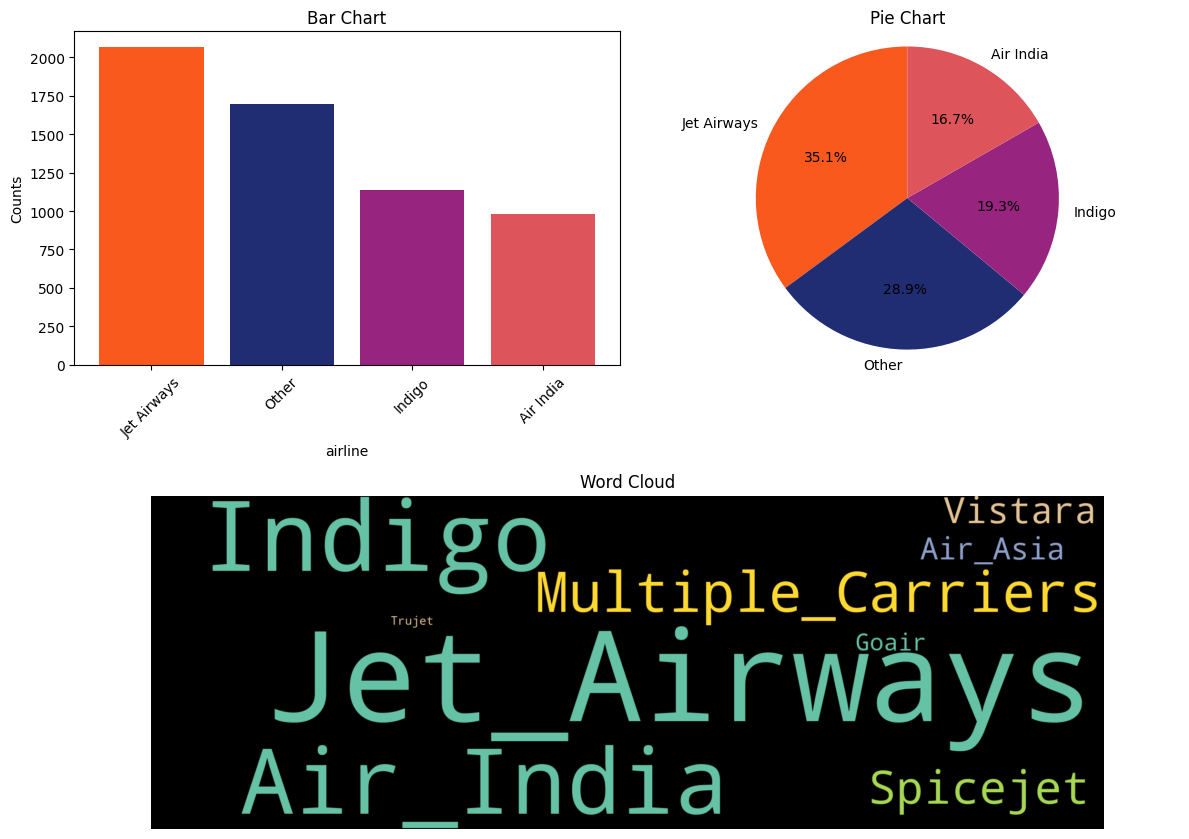

In [37]:
cat_univar_plots(train,"airline",k=3)

In [42]:
def num_cat_bivar_plots(data,
                        num_var,
                        cat_var,
                        k=None,
                        estimator="mean",
                        orient="v",
                        order=None,
                        figsize=(15, 4)):
    
    def get_values(data, num_var, cat_var, estimator, order=None):
        return (
            data
            .groupby(cat_var)
            .agg(estimator, numeric_only=True)
            .loc[:, num_var]
            .dropna()
            .sort_values()
            .reindex(index=order)
        )

    print(f"Bi-variate Analysis between {cat_var} and {num_var}\n")

    if k is None:
        temp = get_values(data, num_var, cat_var, estimator, order=order)
    else:
        data = get_top_k(data, cat_var, k=k)
        temp = get_values(data, num_var, cat_var, estimator)

    if orient == "v":
        fig, axes = plt.subplots(1, 3, figsize=figsize)

        # Bar plot
        sns.barplot(
            x=temp.index,
            y=temp.values,
            color="#d92b2b",
            ax=axes[0],
            edgecolor="black",
            alpha=0.5
        )
        axes[0].set(title="Bar Plot", xlabel=cat_var, ylabel=num_var)
        axes[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

        # Box plot
        sns.boxplot(
            data=data,
            x=cat_var,
            y=num_var,
            color="lightgreen",
            order=temp.index,
            ax=axes[1]
        )
        axes[1].set(title="Box Plot", xlabel=cat_var, ylabel="")
        axes[1].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

        # Violin plot
        sns.violinplot(
            data=data,
            x=cat_var,
            y=num_var,
            color="#0630c9",
            order=temp.index,
            ax=axes[2],
            alpha=0.5
        )
        axes[2].set(title="Violin Plot", xlabel=cat_var, ylabel="")
        axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    else:
        fig, axes = plt.subplots(3, 1, figsize=figsize)

        # Bar plot
        sns.barplot(
            y=temp.index,
            x=temp.values,
            color="#d92b2b",
            ax=axes[0],
            edgecolor="black",
            alpha=0.5
        )
        axes[0].set(title="Bar Plot", xlabel="", ylabel=cat_var)

        # Box plot
        sns.boxplot(
            data=data,
            y=cat_var,
            x=num_var,
            color="lightgreen",
            order=temp.index,
            ax=axes[1]
        )
        axes[1].set(title="Box Plot", xlabel="", ylabel=cat_var)

        # Violin plot
        sns.violinplot(
            data=data,
            y=cat_var,
            x=num_var,
            color="#0630c9",
            order=temp.index,
            ax=axes[2],
            alpha=0.5
        )
        axes[2].set(title="Violin Plot", xlabel=num_var, ylabel=cat_var)

    plt.tight_layout()
    plt.show()



Bi-variate Analysis between airline and price



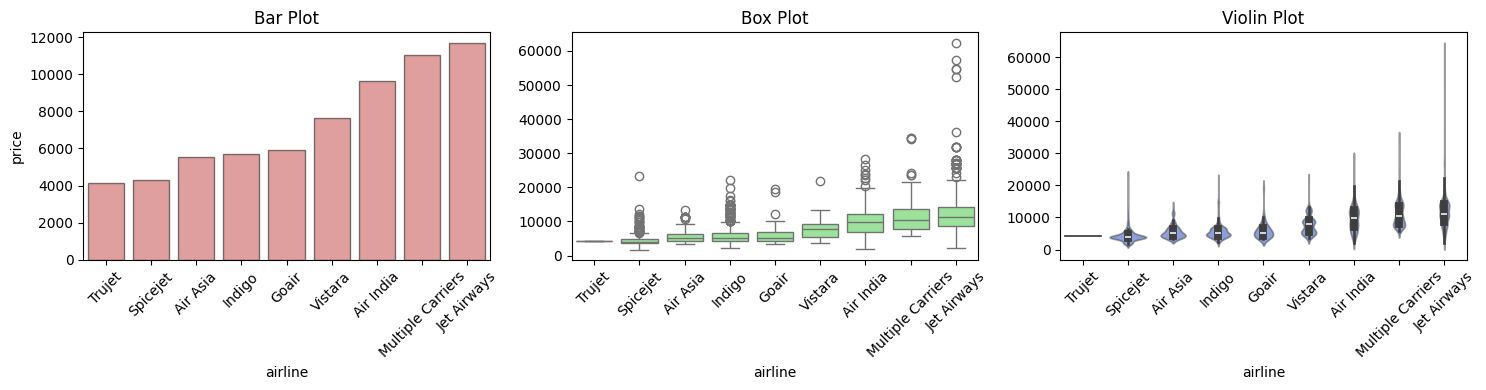

In [43]:
num_cat_bivar_plots(train,num_var="price",cat_var="airline")

### Hypothesis Test for Association between price and airline

In [44]:
from scipy import stats

def num_cat_hyp_testing(data, num_var, cat_var, alpha=0.05):
    # Group the data by categorical variable
    groups_df = (
        data
        .dropna(subset=[num_var])
        .groupby(cat_var)
    )
    groups = [group[num_var].values for _, group in groups_df]

    # ANOVA Test
    anova = stats.f_oneway(*groups)
    statistic = anova[0]
    pvalue = anova[1]
    print(f"ANOVA Test")
    print(f"- Significance Level: {alpha * 100}%")
    print(f"- Null Hypothesis: The groups have similar population mean")
    print(f"- Alternate Hypothesis: The groups don't have similar population mean")
    print(f"- Test Statistic: {statistic}")
    print(f"- p-value: {pvalue}")
    if pvalue < alpha:
        print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
        print(f"- CONCLUSION: The variables {num_var} and {cat_var} are associated with each other")
    else:
        print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
        print(f"- CONCLUSION: The variables {num_var} and {cat_var} are not associated with each other")

    # Kruskal-Wallis Test
    kruskal = stats.kruskal(*groups)
    statistic = kruskal[0]
    pvalue = kruskal[1]
    print(f"\nKruskal-Wallis Test")
    print(f"- Significance Level: {alpha * 100}%")
    print(f"- Null Hypothesis: The groups have similar population median")
    print(f"- Alternate Hypothesis: The groups don't have similar population median")
    print(f"- Test Statistic: {statistic}")
    print(f"- p-value: {pvalue}")
    if pvalue < alpha:
        print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
        print(f"- CONCLUSION: The variables {num_var} and {cat_var} are associated with each other")
    else:
        print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
        print(f"- CONCLUSION: The variables {num_var} and {cat_var} are not associated with each other")


In [45]:
num_cat_hyp_testing(train, "price", "airline")

ANOVA Test
- Significance Level: 5.0%
- Null Hypothesis: The groups have similar population mean
- Alternate Hypothesis: The groups don't have similar population mean
- Test Statistic: 395.98621579271327
- p-value: 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated with each other

Kruskal-Wallis Test
- Significance Level: 5.0%
- Null Hypothesis: The groups have similar population median
- Alternate Hypothesis: The groups don't have similar population median
- Test Statistic: 2647.6921683350265
- p-value: 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated with each other


In [48]:
def rotate_xlabels(ax, rotation=45):
    """
    Rotates the x-axis labels of a given axis.
    
    Parameters:
    ax : matplotlib.axes._axes.Axes
        The axis on which to rotate the labels.
    rotation : int, optional
        The angle of rotation for the labels (default is 45 degrees).
    """
    for label in ax.get_xticklabels():
        label.set_rotation(rotation)
    ax.figure.tight_layout()


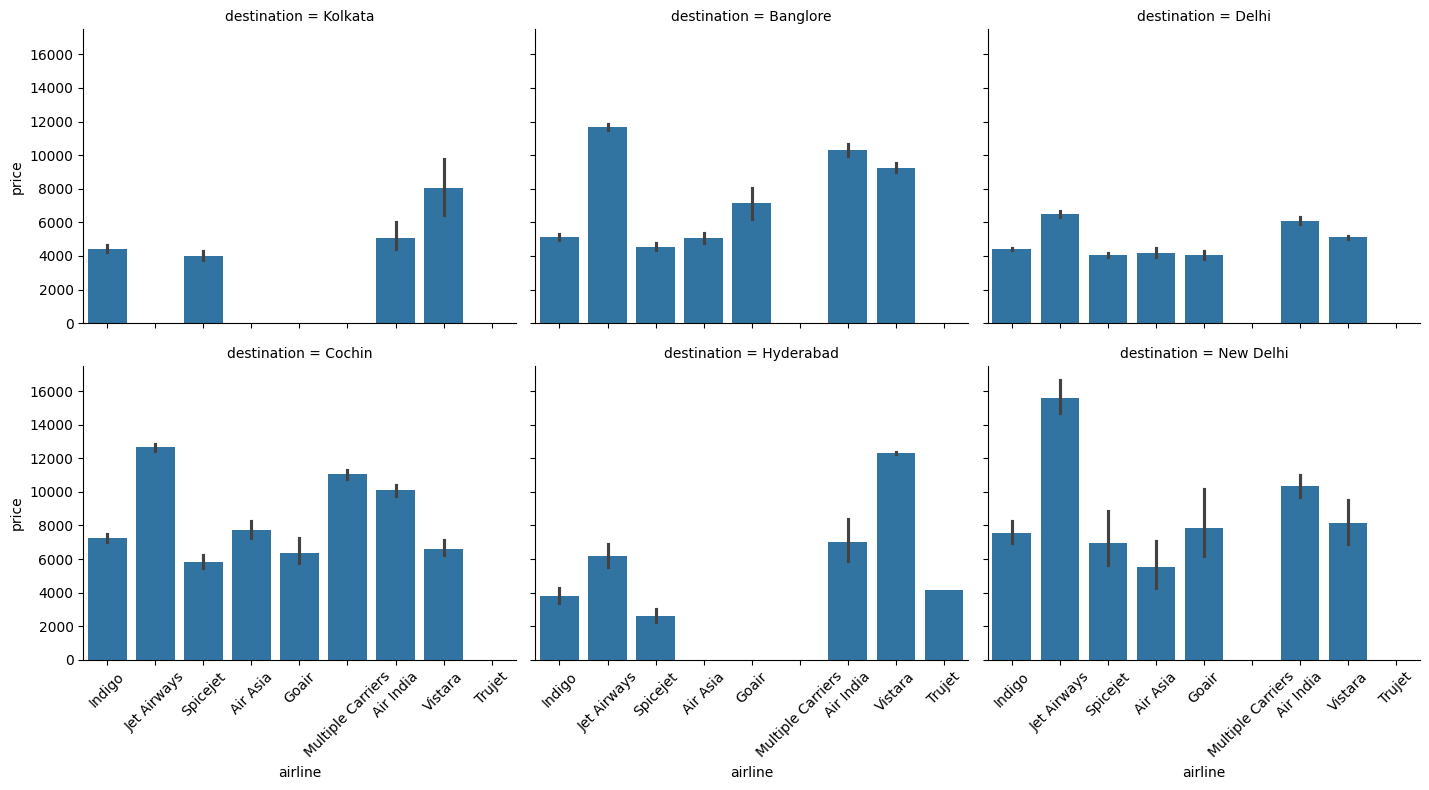

In [49]:

airline_grid = sns.FacetGrid(
	data=train,
	col="destination",
	col_wrap=3,
	height=4,
	aspect=1.2,
	sharey=True
)

airline_grid.map(sns.barplot, "airline", "price", order=train.airline.unique())
for ax in airline_grid.axes[3:]:
	rotate_xlabels(ax)


### Date_of_journey

In [50]:
# Univariate plots for date-time variables
def dt_univar_plots(data, var, target=None, bins="auto"):
    col = data.loc[:, var].copy()

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

    # Histogram
    sns.histplot(
        data=data,
        x=var,
        bins=bins,
        color="#1973bd",
        ax=ax1
    )
    sns.rugplot(
        data=data,
        x=var,
        color="darkblue",
        height=0.035,
        ax=ax1
    )
    ax1.set(title="Histogram")
    rotate_xlabels(ax1)

    # Line-plot
    sns.lineplot(
        data=data,
        x=var,
        y=target,
        color="#d92b2b",
        ax=ax2
    )
    rotate_xlabels(ax2)
    ax2.set(title="Line Plot")


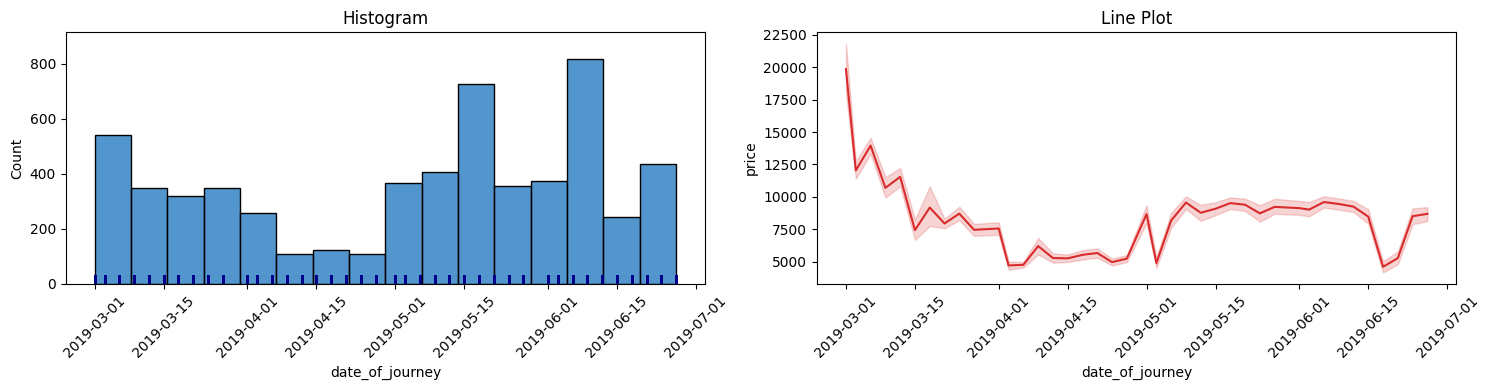

In [51]:
dt_univar_plots(
	data=train,
	var="date_of_journey",
	target="price"
)

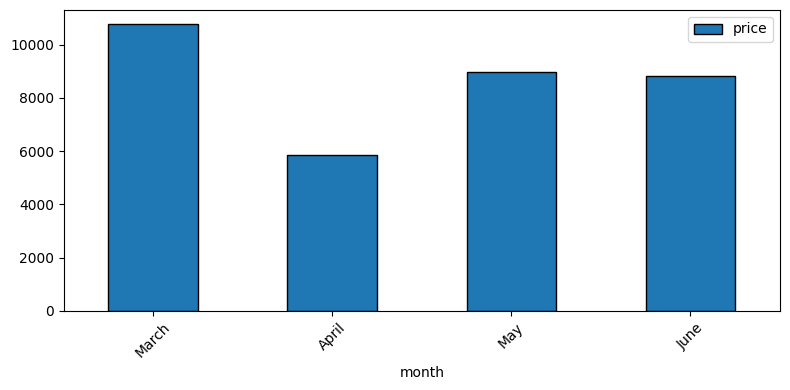

In [61]:

(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="M"))
	.price.mean()
	.to_frame()
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
rotate_xlabels(ax)

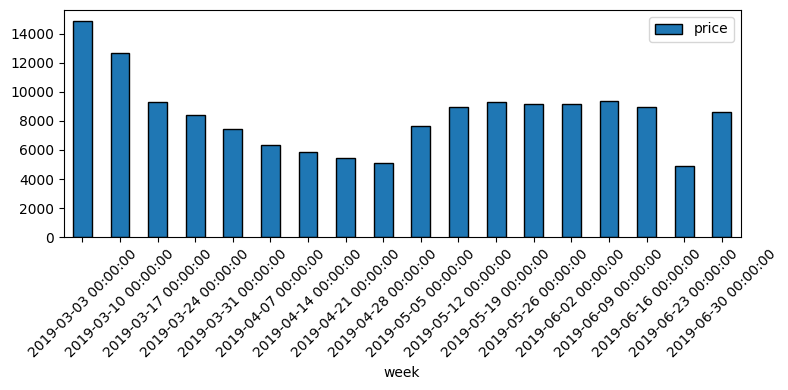

In [62]:

(
	train
	.groupby(pd.Grouper(key="date_of_journey", freq="W"))
	.price.mean()
	.to_frame()
	.rename_axis(index="week")
	.plot(
		kind="bar",
		figsize=(8, 4),
		edgecolor="black"
	)
)

ax = plt.gca()
rotate_xlabels(ax)

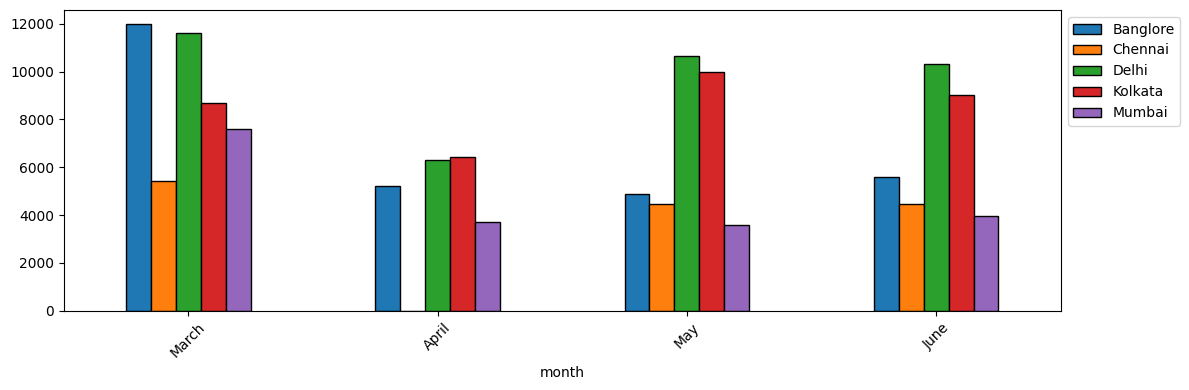

In [64]:

(
	train
	.groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
	.price.mean()
	.unstack(fill_value=0)
	.set_axis(["March", "April", "May", "June"], axis=0)
	.rename_axis(index="month")
	.plot(
		kind="bar",
		figsize=(12, 4),
		edgecolor="black"
	)
)

ax = plt.gca()

ax.legend(
	loc="upper left",
	bbox_to_anchor=(1, 1)
)

rotate_xlabels(ax)

### dep_time

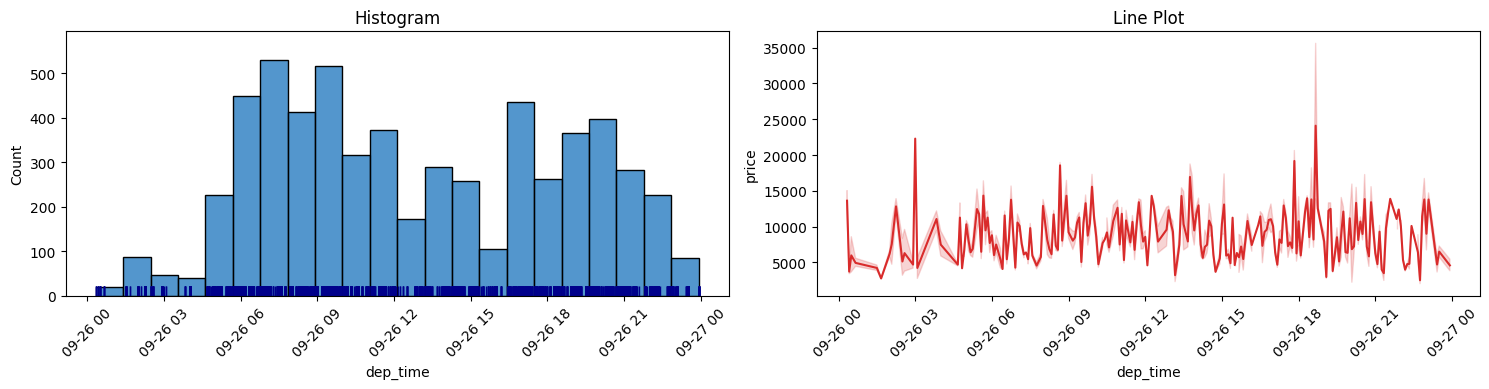

In [65]:
dt_univar_plots(train, "dep_time", "price")

Bi-variate Analysis between dep_time and price



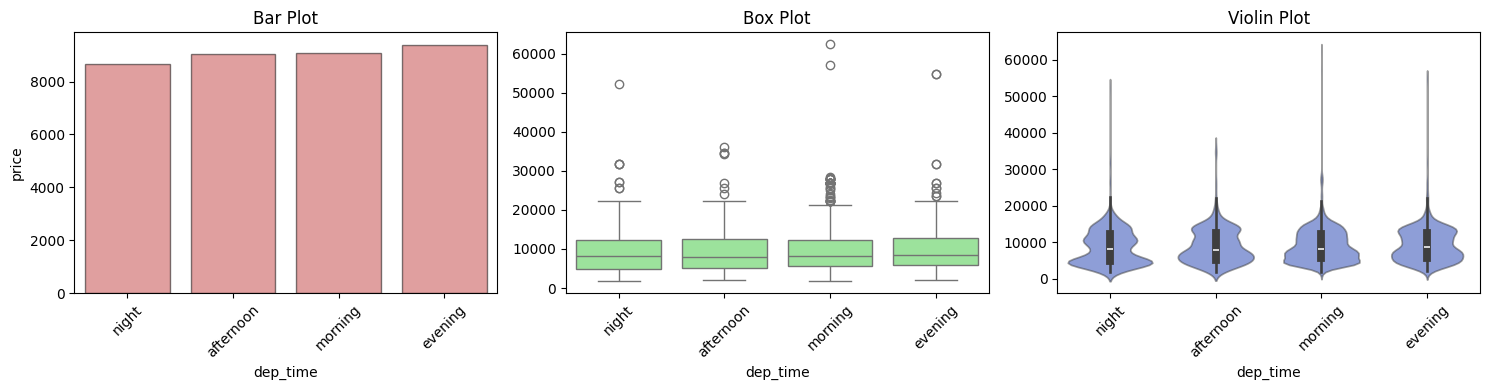

In [66]:
(
	train
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(num_cat_bivar_plots, "price", "dep_time")
)

### Duration

In [68]:
def num_summary(data, var):
    warnings.filterwarnings("ignore")

    # title
    col = data.loc[:, var].copy()
    print(f"\nSummary for: {var}\n{'=' * 30}")

    # quick glance
    print("Quick Glance:")
    display(col)

    # meta-data
    print("\nMeta-data:")
    print(f"{'Data Type':15}: {col.dtype}")
    print(f"{'Missing Data':15}: {col.isna().sum():,} rows ({col.isna().mean() * 100:.2f} %)")
    print(f"{'Available Data':15}: {col.count():,} / {len(col):,} rows")

    # quantiles
    print("\nPercentiles:")
    percentiles = col.quantile([0.0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1.0]).rename(index=lambda val: f"{val * 100:.0f}").rename("value").rename_axis(index="percentile").to_frame()
    display(percentiles)

    # central tendency
    print("\nCentral Tendency:")
    central_tendency = pd.Series({
        "mean": col.mean(),
        "trimmed mean (5%)": stats.trim_mean(col.values, 0.05),
        "trimmed mean (10%)": stats.trim_mean(col.values, 0.1),
        "median": col.median()
    }).rename("value").to_frame()
    display(central_tendency)

    # spread
    print("\nMeasure of Spread:")
    std = col.std()
    iqr = col.quantile(0.75) - col.quantile(0.25)
    spread = pd.Series({
        "var": col.var(),
        "std": std,
        "IQR": iqr,
        "mad": stats.median_abs_deviation(col.dropna()),
        "coef_variance": std / col.mean()
    }).rename("value").to_frame()
    display(spread)

    # skewness and kurtosis
    print("\nSkewness and Kurtosis:")
    skew_kurt = pd.Series({
        "skewness": col.skew(),
        "kurtosis": col.kurtosis()
    }).rename("value").to_frame()
    display(skew_kurt)

    alpha = 0.05
    # test for normality
    print("\nHypothesis Testing for Normality:")
    
    # shapiro-wilk test
    print("Shapiro-Wilk Test:")
    sw_test = stats.shapiro(col.dropna().values)
    sw_statistic = sw_test.statistic
    sw_pvalue = sw_test.pvalue
    print(f"{'Significance Level':21}: {alpha}")
    print(f"{'Null Hypothesis':21}: The data is normally distributed")
    print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
    print(f"{'p-value':21}: {sw_pvalue}")
    print(f"{'Test Statistic':21}: {sw_statistic}")
    if sw_pvalue < alpha:
        print(f"- Since p-value is less than alpha ({alpha}), we Reject the Null Hypothesis at {alpha * 100}% significance level")
        print("- CONCLUSION: We conclude that the data sample is not normally distributed")
    else:
        print(f"- Since p-value is greater than alpha ({alpha}), we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
        print("- CONCLUSION: We conclude that the data sample is normally distributed")

    # anderson-darling test
    print("\nAnderson-Darling Test:")
    ad_test = stats.anderson(col.dropna().values, dist="norm")
    ad_statistic = ad_test.statistic
    ad_critical = ad_test.critical_values[2]
    print(f"{'Significance Level':21}: {alpha}")
    print(f"{'Null Hypothesis':21}: The data is normally distributed")
    print(f"{'Alternate Hypothesis':21}: The data is not normally distributed")
    print(f"{'Critical Value':21}: {ad_critical}")
    print(f"{'Test Statistic':21}: {ad_statistic}")
    if ad_statistic >= ad_critical:
        print(f"- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at {alpha * 100}% significance level")
        print("- CONCLUSION: We conclude that the data sample is not normally distributed")
    else:
        print(f"- Since the Test-statistic is less than Critical Value, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
        print("- CONCLUSION: We conclude that the data sample is normally distributed")

In [69]:
num_summary(train, "duration")


Summary for: duration
Quick Glance:


0        140
1       1630
2        170
3        810
4        155
        ... 
5879     875
5880    1480
5881     500
5882     480
5883     360
Name: duration, Length: 5884, dtype: int64


Meta-data:
Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 5,884 / 5,884 rows

Percentiles:


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,505.0
75,910.0
90,1440.0
95,1610.0
99,1855.0



Central Tendency:


,value
mean,631.098742
trimmed mean (5%),596.862727
trimmed mean (10%),567.818607
median,505.000000



Measure of Spread:


,value
var,251630.243350
std,501.627594
IQR,740.000000
mad,335.000000
coef_variance,0.794848



Skewness and Kurtosis:


,value
skewness,0.908737
kurtosis,-0.051310



Hypothesis Testing for Normality:
Shapiro-Wilk Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.3925419190673573e-54
Test Statistic       : 0.8853350449975342
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed

Anderson-Darling Test:
Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.786
Test Statistic       : 220.5586836922439
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Univariate Analysis of duration


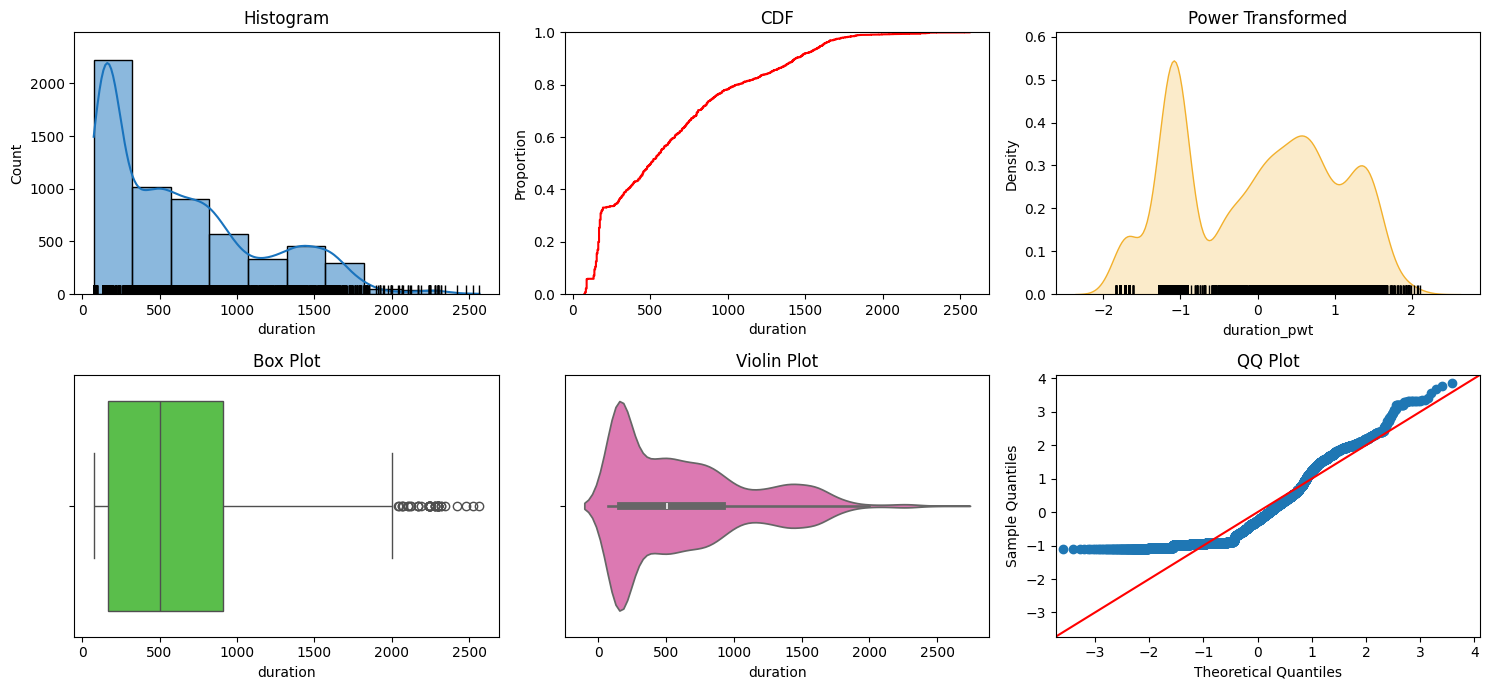

In [70]:
num_univar_plots(train, "duration")

In [74]:
# hypothesis testing for association between 2 numeric variables
def num_num_hyp_testing(data, var1, var2, alpha=0.05):
    warnings.filterwarnings("ignore")

    print(f"\nHypothesis Test for Association between {var1} and {var2}\n{'=' * 40}")

    temp = (
        data
        .dropna(subset=[var1, var2], how="any")
        .copy()
    )

    # Pearson test
    pearson = stats.pearsonr(temp[var1].values, temp[var2].values)
    pvalue = pearson.pvalue
    statistic = pearson.statistic
    print("\nPearson Test:")
    print(f"- {'Significance Level':21}: {alpha * 100}%")
    print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
    print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
    print(f"- {'Test Statistic':21}: {statistic}")
    print(f"- {'p-value':21}: {pvalue}")
    if pvalue < alpha:
        print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
        print(f"- CONCLUSION: The variables {var1} and {var2} are correlated")
    else:
        print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
        print(f"- CONCLUSION: The variables {var1} and {var2} are uncorrelated")

    # Spearman test
    spearman = stats.spearmanr(temp[var1].values, temp[var2].values)
    pvalue = spearman.pvalue
    statistic = spearman.statistic
    print("\nSpearman Test:")
    print(f"- {'Significance Level':21}: {alpha * 100}%")
    print(f"- {'Null Hypothesis':21}: The samples are uncorrelated")
    print(f"- {'Alternate Hypothesis':21}: The samples are correlated")
    print(f"- {'Test Statistic':21}: {statistic}")
    print(f"- {'p-value':21}: {pvalue}")
    if pvalue < alpha:
        print(f"- Since p-value is less than {alpha}, we Reject the Null Hypothesis at {alpha * 100}% significance level")
        print(f"- CONCLUSION: The variables {var1} and {var2} are correlated")
    else:
        print(f"- Since p-value is greater than {alpha}, we Fail to Reject the Null Hypothesis at {alpha * 100}% significance level")
        print(f"- CONCLUSION: The variables {var1} and {var2} are uncorrelated")

# Example usage
# df = pd.DataFrame(...)  # replace with your DataFrame
# num_num_hyp_testing(df, 'variable1', 'variable2')  # replace with actual variable names

In [75]:
num_num_hyp_testing(train, "price", "duration")


Hypothesis Test for Association between price and duration

Pearson Test:
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5015253713953509
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated

Spearman Test:
- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6915198829124223
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


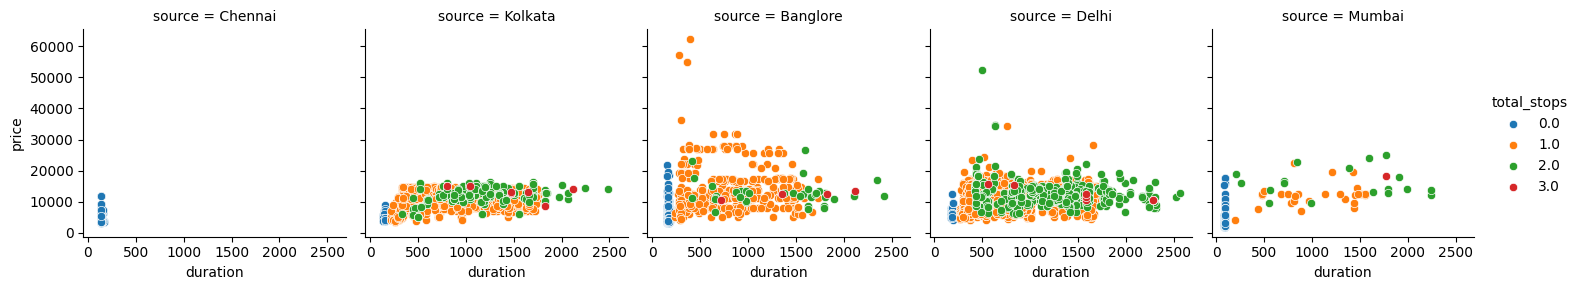

In [76]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

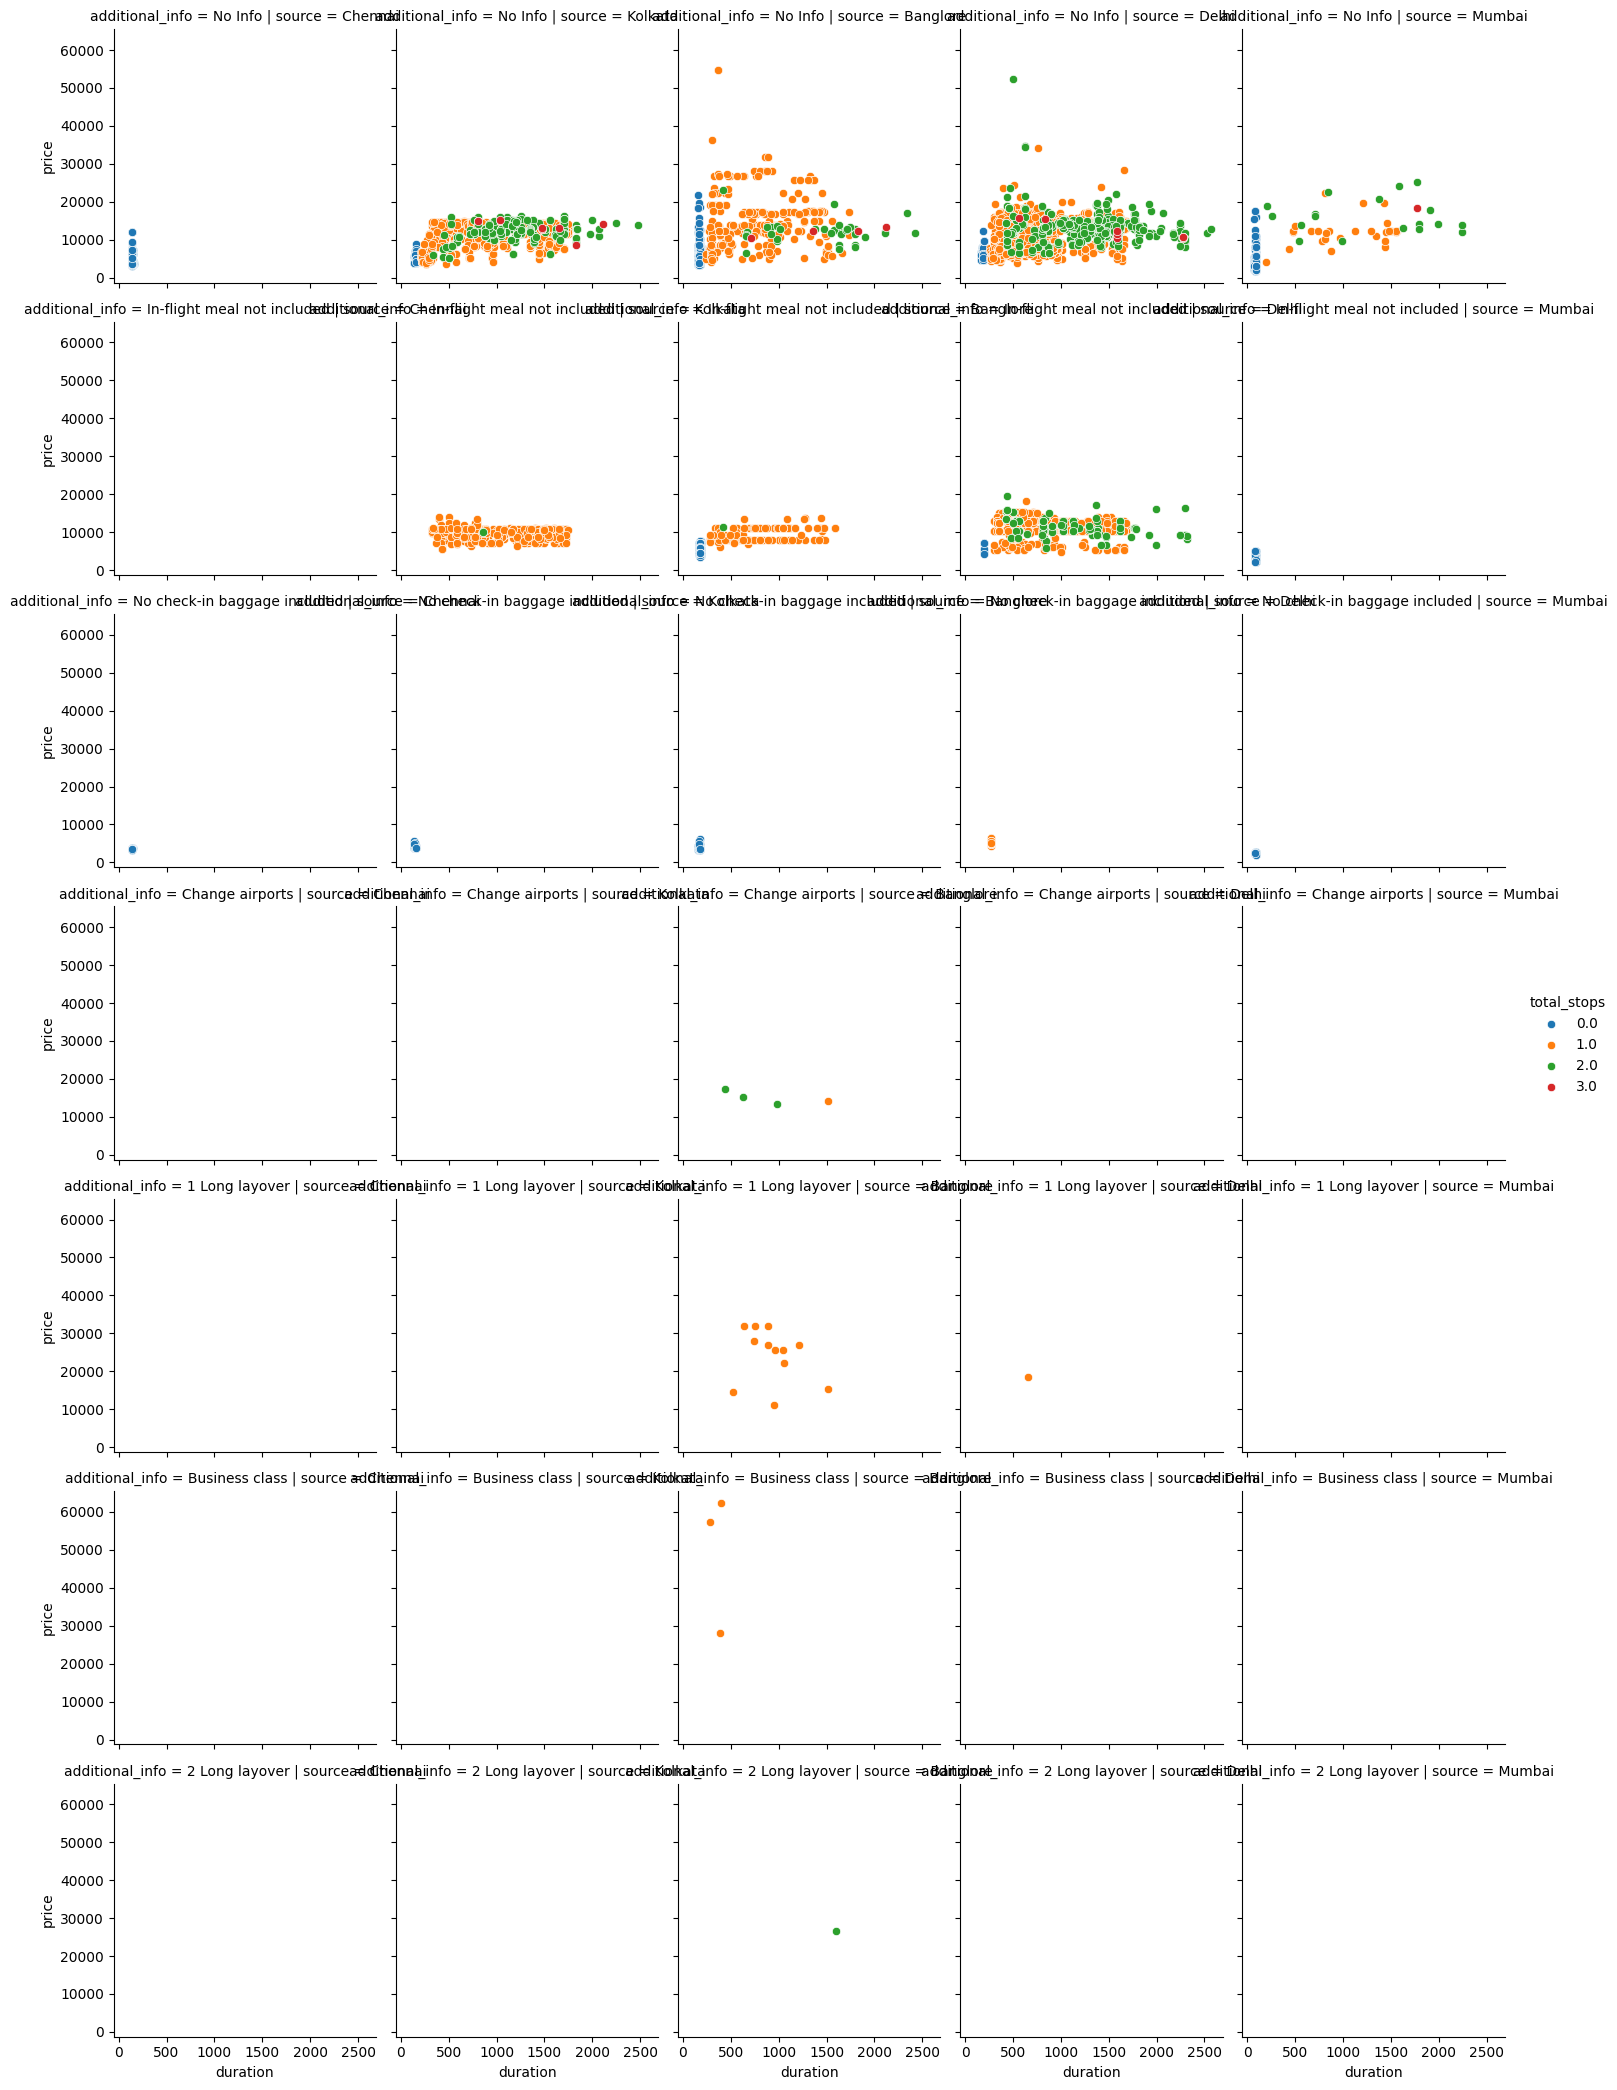

In [77]:
duration_grid = sns.FacetGrid(
	data=train,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

In [78]:
cat_summary(train, "additional_info")


Quick Glance of additional_info:


0                           No Info
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
5879                        No Info
5880                        No Info
5881                        No Info
5882                        No Info
5883    In-flight meal not included
Name: additional_info, Length: 5884, dtype: object


Meta-data:
Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 5,884 / 5,884 rows

Summary:


,
count,5884
unique,7
top,No Info
freq,4617



Categories Distribution:


,count,percentage
category,,
No Info,4617,0.784670
In-flight meal not included,1063,0.180659
No check-in baggage included,183,0.031101
1 Long layover,13,0.002209
Change airports,4,0.000680
Business class,3,0.000510
2 Long layover,1,0.000170


Univariate Analysis of additional_info



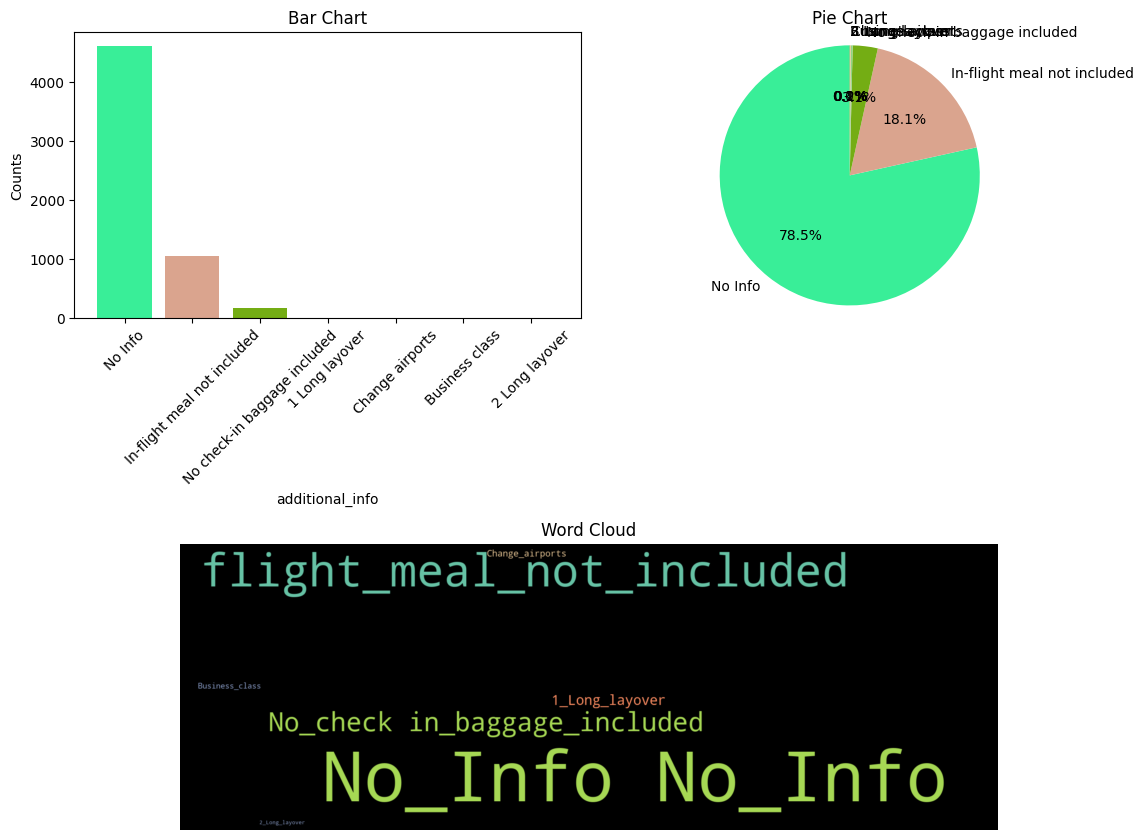

In [79]:
cat_univar_plots(train, "additional_info")

Bi-variate Analysis between additional_info and price



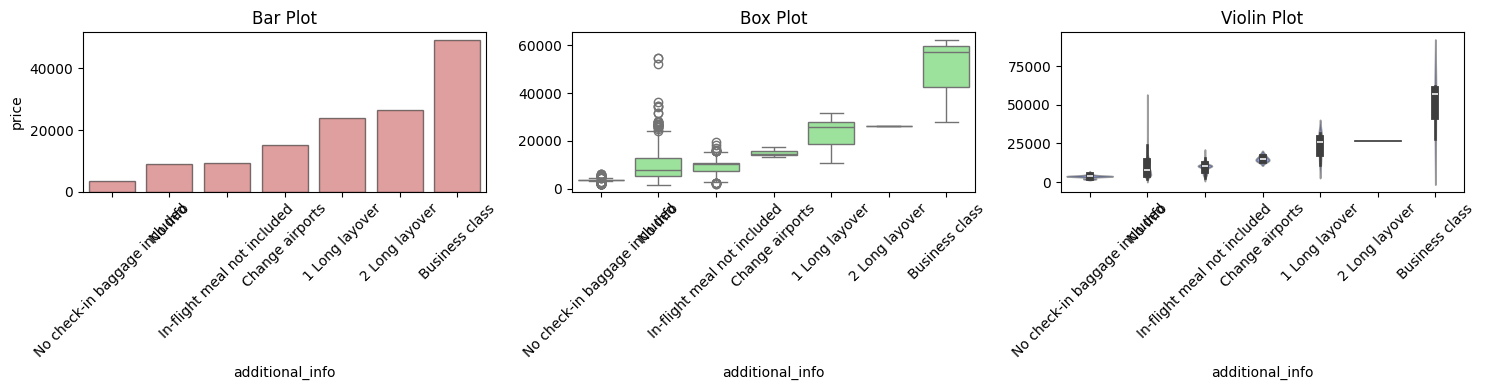

In [80]:
num_cat_bivar_plots(train, "price", "additional_info")

In [81]:
#we will convert additional_info to binart feature since it has several rare categories

Bi-variate Analysis between additional_info and price



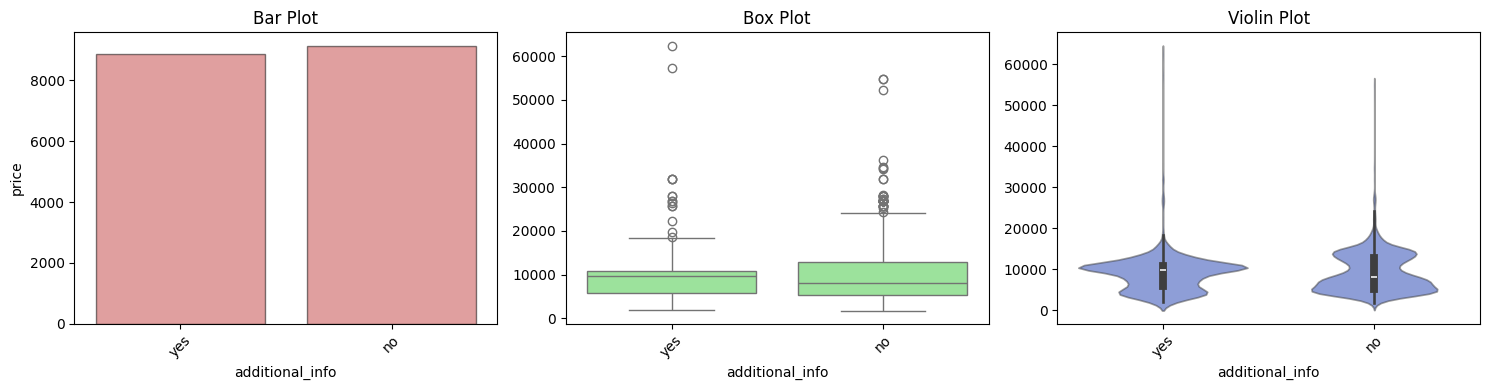

In [83]:
(
	train
	.assign(additional_info=(
		train
		.additional_info
		.pipe(lambda ser: np.where(ser.eq("No Info"), "no", "yes"))
	))
	.pipe(num_cat_bivar_plots, "price", "additional_info")
)